# Graded Challenge 3

# Perkenalan

>- Nama      : Alsello Diveni Manuputty
>- Batch     : HCK 6 Pondok Indah
>- Phase     : 1
------
**Objective**
>Pada notebook ini akan dilakukan pengerjaan Graded Challenge 3 fase 1 dimama akan dibuat model Random Forest dan satu algoritma boosting untuk memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan dataset yang sudah diberi.

```
SELECT  *
FROM    `ftds-hacktiv8-project.phase1_ftds_006_hck.heart-failure`
```

# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
!pip install xgboost
import xgboost as xgb

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
mentah = pd.read_csv('h8dsft_P1G3_AlselloDM.csv')

In [3]:
mentah.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  42.0        1                       250         1                 15   
1  46.0        0                       168         1                 17   
2  65.0        1                       160         1                 20   
3  53.0        1                        91         0                 20   
4  50.0        1                       582         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   213000.0               1.3           136    0   
1                    1   271000.0               2.1           124    0   
2                    0   327000.0               2.7           116    0   
3                    1   418000.0               1.4           139    0   
4                    1   279000.0               1.0           134    0   

   smoking  time  DEATH_EVENT  
0        0    65            1  
1        0   100            1  
2        0     8            1  
3        0    43            1  
4        0   186            0

In [4]:
mentah.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  63.0        1                       122         1                 60   
295  45.0        0                       308         1                 60   
296  70.0        0                        97         0                 60   
297  53.0        1                       446         0                 60   
298  50.0        0                       582         0                 62   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    0  267000.00               1.2           145    1   
295                    1  377000.00               1.0           136    1   
296                    1  220000.00               0.9           138    1   
297                    1  263358.03               1.0           139    1   
298                    1  147000.00               0.8           140    1   

     smoking  time  DEATH_EVENT  
294        0   147            0  
295        0   186            0  
296        0   186            0  
297        0   215            0  
298        1   192            0

In [5]:
# melihat bentuk data
mentah.shape

(299, 13)

In [6]:
# melihat info data
mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# cek missing value
mentah.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dari data loading, terlihat bahwa datanya berjumlah 13 kolom dan 299 baris. Semua data tidak memiliki null sehingga tidak perlu membersihkan missing value.

Berikut deskripsi masing-masing kolom agar memudahkan analisa:

- age : Age
- anaemia : Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase : Level of the CPK Enzyme in the blood (mcg/L)
- diabetes : If the patient has Diabetes (boolean)
- ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure : If the patient has Hypertension (boolean)
- platelets : Platelets in the blood (kiloplatelets/mL)
- serum_creatinine : Level of serum creatinine in the blood (mg/dL)
- serum_sodium : Level serum of sodium in the blood (mEq/L)
- sex : Woman or Man (binary)
- smoking : If the patient smokes or not (boolean)
- time : Follow up period (days)
- DEATH_EVENT : If the patient deceased during the follow up (boolean)

In [8]:
mentah.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
# rename kolom untuk memudahkan pengerjaan
mentah.rename(columns={'DEATH_EVENT':'death_event'},inplace= True)

# Data Cleaning

In [10]:
df_clean = mentah.copy()

In [11]:
# cek duplicates
df_clean[df_clean.duplicated()].shape

(0, 13)

Dari cek duplicates, tidak ada data yang duplicate.

Berhubung data sudah cukup bersih, maka akan langsung masuk ke proses EDA

# Exploratory Data Analysis

In [12]:
df_eda = df_clean.copy()

Karena keseluruhan data sudah dalam representasi numerik, maka akan langsung saja di visualisasikan untuk membantu pemahaman data.

<Axes: >

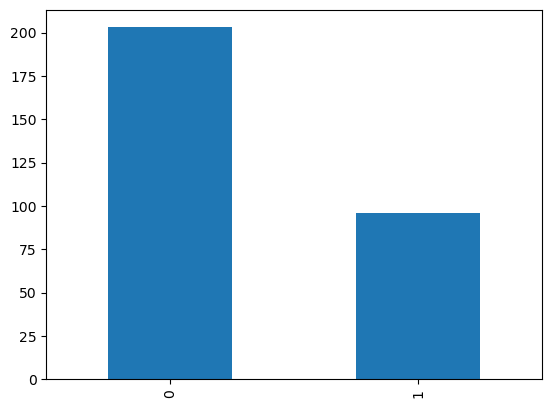

In [13]:
# visualisasi pie chart untuk target
df_eda['death_event'].value_counts().plot(kind='bar')

Dari data terlihat untuk target, ada data imbalance, dari visualisasi ini bisa di expect bahwa performa model akan kurang maksimal.

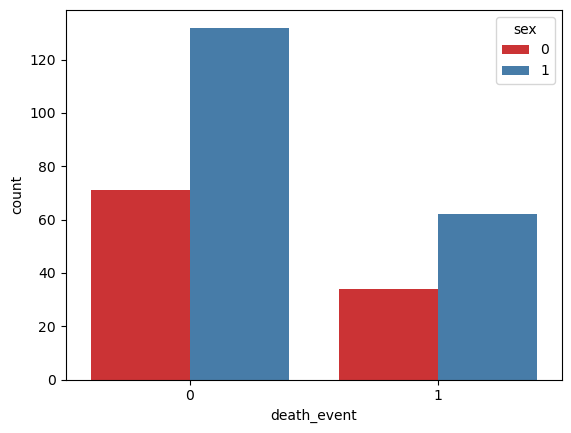

In [14]:
# visualisasi kematian berdasarkan jenis kelamin

sns.countplot(data=df_eda, x='death_event', hue='sex',palette='Set1')
plt.show()

Dari umurnya, pasien yang banyak meninggal adalah pasien wanita. Jumlah pasien nya juga lebih banyak wanita.

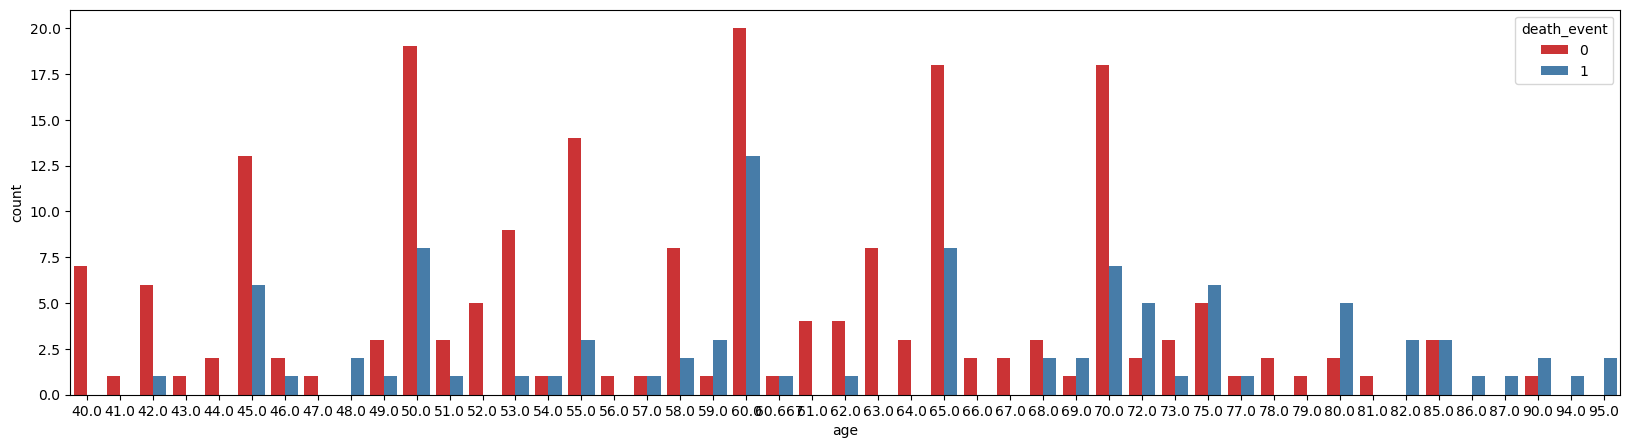

In [15]:
# visualisasi umur pasien

plt.figure(figsize=(20, 5))
sns.countplot(data=df_eda, x='age', hue='death_event',palette='Set1')
plt.show()

Terlihat dari umur, data pasien paling banyak di umur 60 tahun. Yang palik banyak kematiannya berdasarkan umur juga di umur 60 tahun.

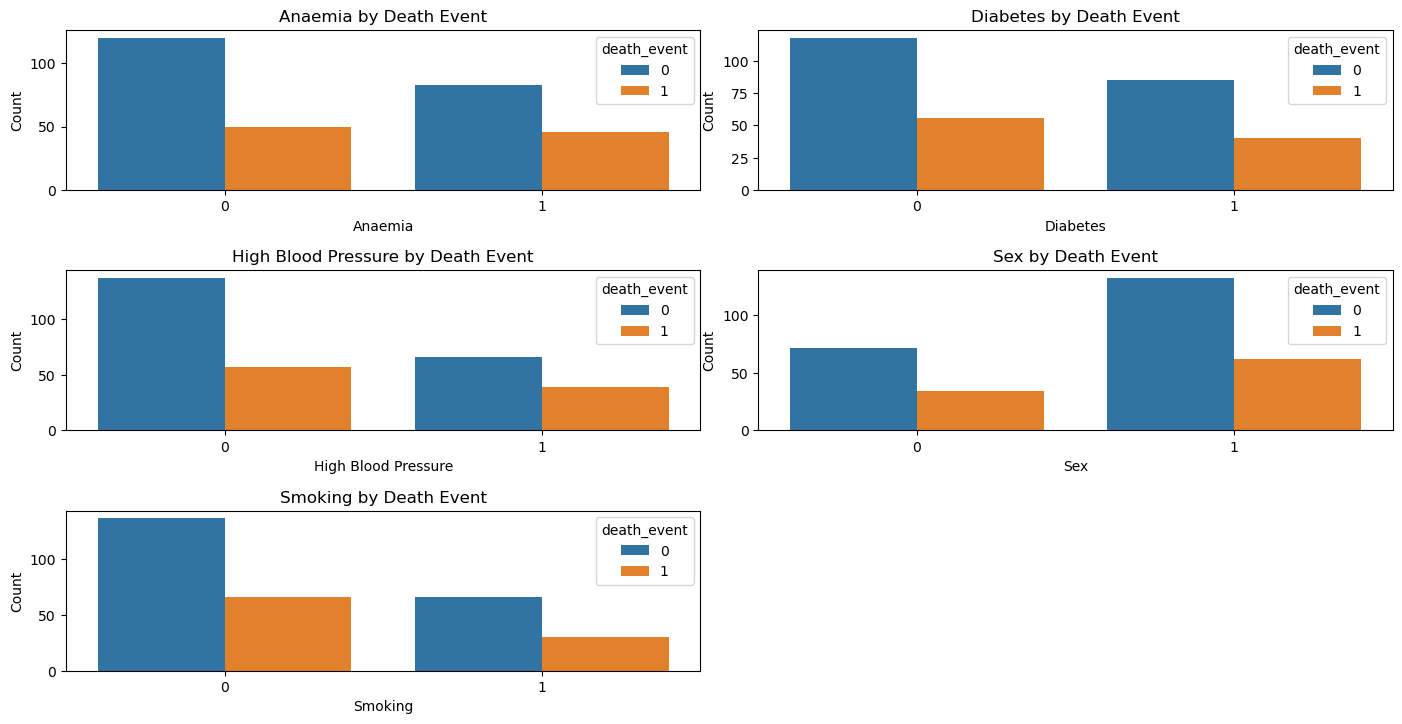

In [16]:
# Create subplots with separate count plots for each category of 'death_event'
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 7))
plt.tight_layout()

# Count plot for 'anaemia' grouped by 'death_event'
sns.countplot(data=df_eda, x='anaemia', hue='death_event', ax=ax[0, 0])
ax[0, 0].set_title('Anaemia by Death Event')
ax[0, 0].set_xlabel('Anaemia')
ax[0, 0].set_ylabel('Count')

# Count plot for 'diabetes' grouped by 'death_event'
sns.countplot(data=df_eda, x='diabetes', hue='death_event', ax=ax[0, 1])
ax[0, 1].set_title('Diabetes by Death Event')
ax[0, 1].set_xlabel('Diabetes')
ax[0, 1].set_ylabel('Count')

# Count plot for 'high_blood_pressure' grouped by 'death_event'
sns.countplot(data=df_eda, x='high_blood_pressure', hue='death_event', ax=ax[1, 0])
ax[1, 0].set_title('High Blood Pressure by Death Event')
ax[1, 0].set_xlabel('High Blood Pressure')
ax[1, 0].set_ylabel('Count')

# Count plot for 'sex' grouped by 'death_event'
sns.countplot(data=df_eda, x='sex', hue='death_event', ax=ax[1, 1])
ax[1, 1].set_title('Sex by Death Event')
ax[1, 1].set_xlabel('Sex')
ax[1, 1].set_ylabel('Count')

# Count plot for 'smoking' grouped by 'death_event'
sns.countplot(data=df_eda, x='smoking', hue='death_event', ax=ax[2, 0])
ax[2, 0].set_title('Smoking by Death Event')
ax[2, 0].set_xlabel('Smoking')
ax[2, 0].set_ylabel('Count')

# Remove empty subplot
fig.delaxes(ax[2, 1])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()


Diatas adalah beberapa visualisasi dari hubungan beberapa kolom dibandingkan dengan kematian. Tidak ada pola tertentu yang memang bisa di kerucutkan. Kejadiannya masih random.

In [17]:
#Checking the dataset description
df_eda.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       death_event  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

**serum_creatinine** adalah kadar creatinine dalam darah. Berdasarkan riset, jumlah creatinine normal adalah 0.9 to 1.3 mg/dL untuk pria dan 0.6 to 1.1mg/dL intuk perempuan 18 sampai 60 tahun. Jumlah serum_creatinine menyatakan bahwa kerja ginjal lemah atau saluran kemih yang tersumbat, dan dehidrasi. Jika dilihat dari nilai tabel, rata-rata memiliki 1.1 namun ada yang 9.4 yang cukup jauh dari kadar seharusnya.

Berdasarkan data, dapat diketahui bahwa :
- Rentang usia berkisar antara 49-71 tahun
- Distribusi pada creatinine phospokinase adalah skew apabila dilihat dari nilai rata-rata dan mediannya. Dapat diketahui bahwa rentang nilai Creatinine Phospokinase pada pasien yaitu 250-582 mcg/L yang berarti diatas ambang normal dimana normalnya 10-129 mcg/L
- Rata-rata memiliki nilai Ejection Fraction dibawah batas normal yaitu masih di dalam range 50-70. Hal ini menunjukkan bahwa rata-rata orang di dalam data ini memiliki masalah pada jantung.
- Jumlah rata-rata platelets/sel darah putih pada pasien yaitu 263.358 kPL/mLyang berarti rata-rata pasien memiliki jumlah sel darah putih di dalam batas normal. Platelet adalah sel yang bersirkulasi dan memperbaiki kerusakan.Platelet normal berada diantara 150,000 sampai 450,000 platelets per microliter darah. Kondisi melebihi 450,000 platelet adalah kondisi bernama thrombocytosisi dan dibawah 150,000 bernama thrombcytopenia.
- Rata-rata pasien memiliki angka serum sodium dengan nilai normal yaitu 137 mEq/dL
- Waktu follow-up pada pasien berkisar dari 115-285 hari


# Feature Relationship

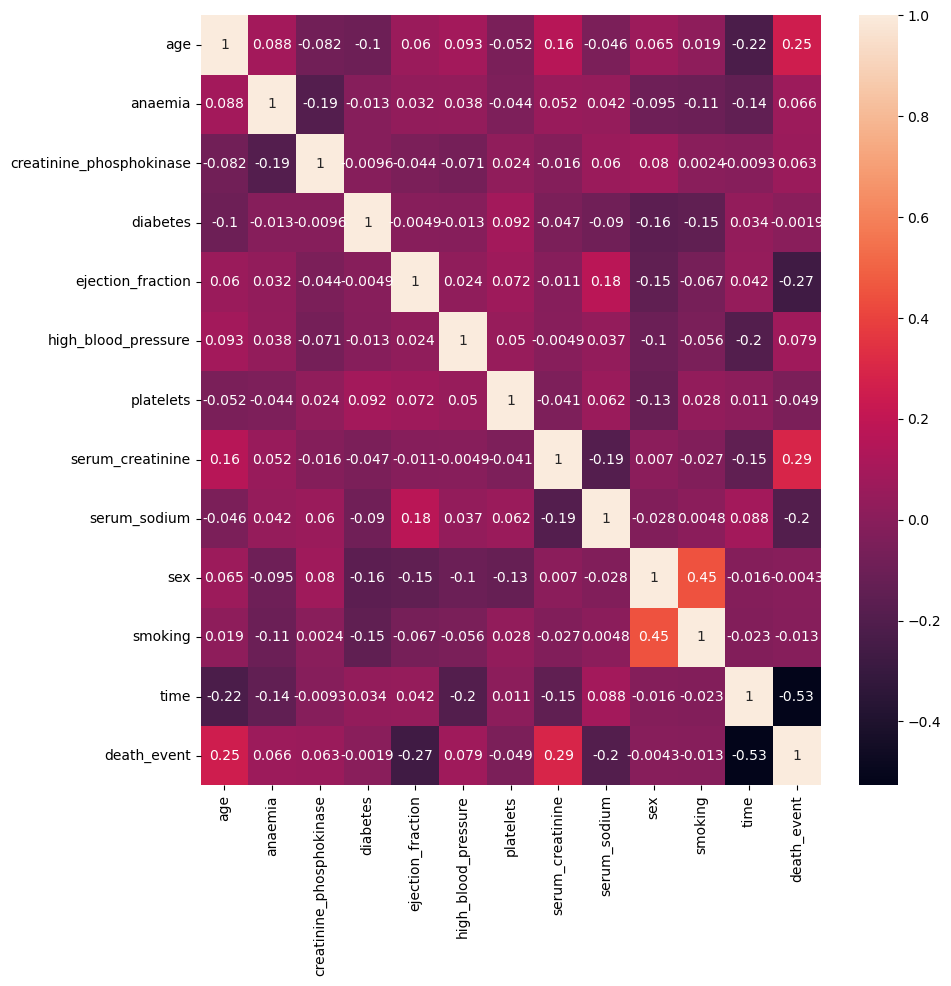

In [18]:
# cek korelasi fitur dan target
plt.figure(figsize=(10,10))
sns.heatmap(df_eda.corr(), annot=True)
plt.show()

Dari heatmap diatas terlihat bahwa ejection_fraction, platelets,serum_creatinine,time,sex dan smoking memiliki hubungan berbanding terbalik death_event.

Yang korelasinya cukup tinggi adalah age, ejection fraction, serum creatinine, serum sodium, dan time. Cukup mengejutkan karena banyak kolom yang terasa pengaruh ternyata tidak.

In [19]:
df_eda.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [20]:
# cek unique value masing masing kategori
for i in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event'
]:
    print(i, '\n')
    print(df_eda[i].value_counts())
    print('-'*30)

anaemia 

0    170
1    129
Name: anaemia, dtype: int64
------------------------------
diabetes 

0    174
1    125
Name: diabetes, dtype: int64
------------------------------
high_blood_pressure 

0    194
1    105
Name: high_blood_pressure, dtype: int64
------------------------------
sex 

1    194
0    105
Name: sex, dtype: int64
------------------------------
smoking 

0    203
1     96
Name: smoking, dtype: int64
------------------------------
death_event 

0    203
1     96
Name: death_event, dtype: int64
------------------------------


Dari data kategorik terlihat tidak ada yang high cardinality.

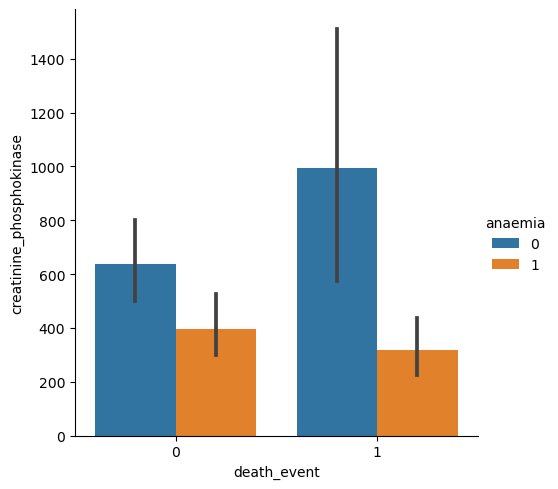

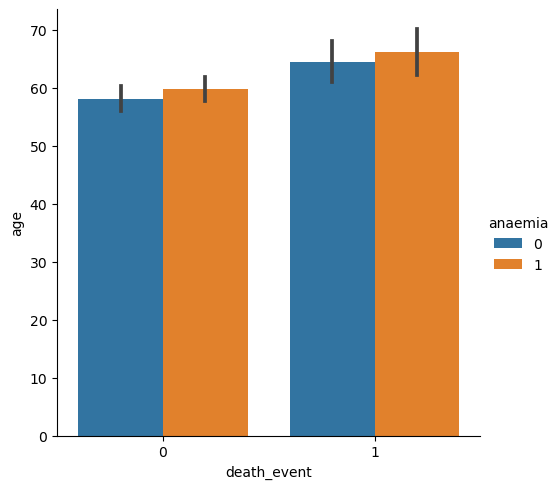

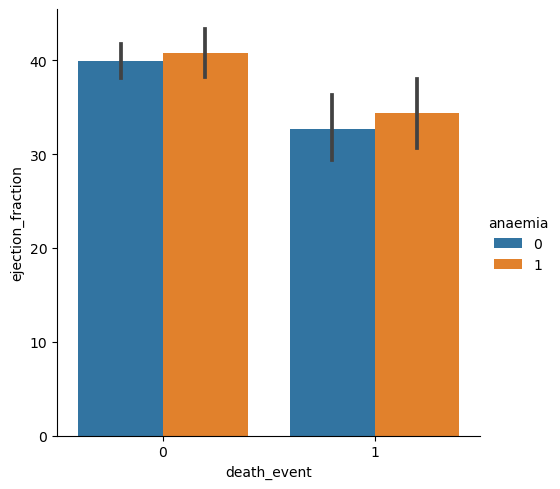

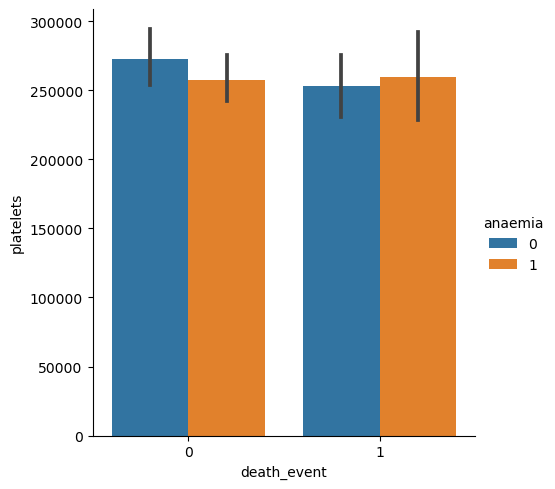

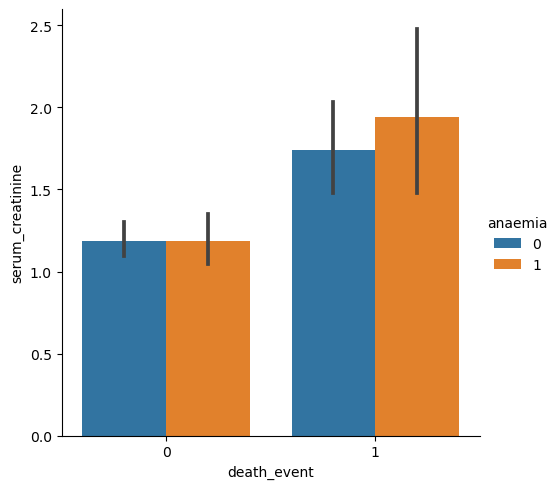

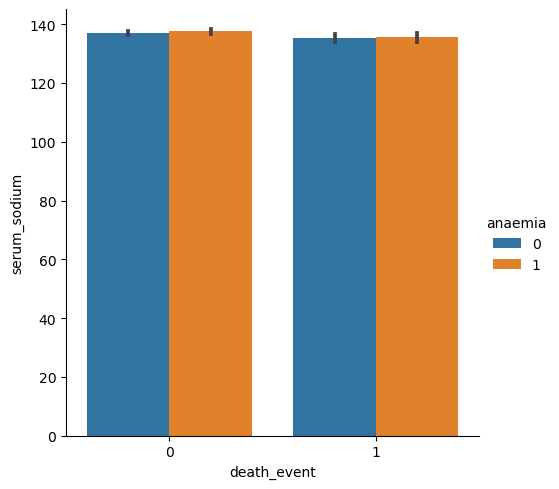

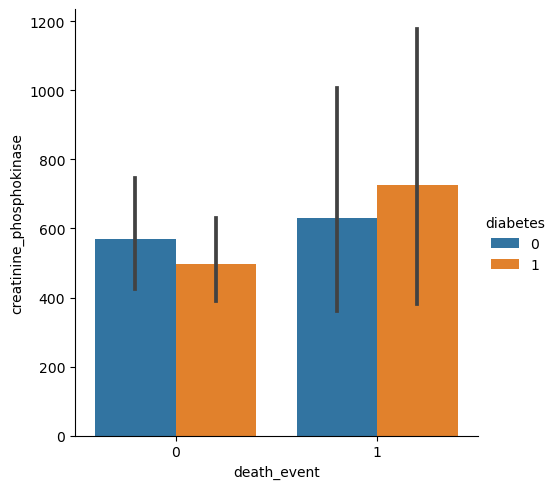

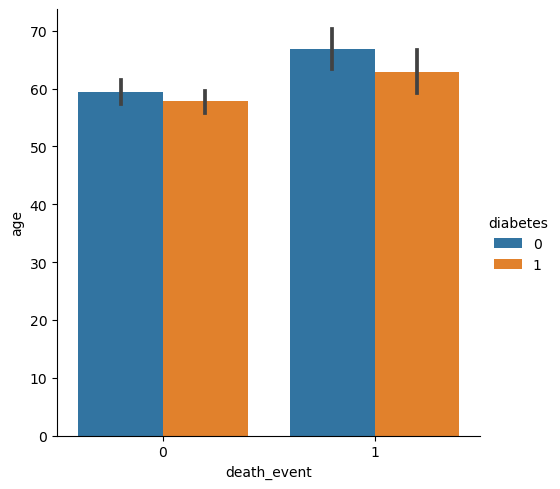

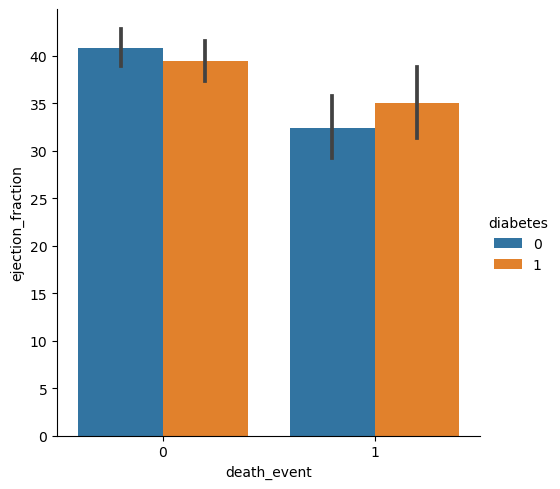

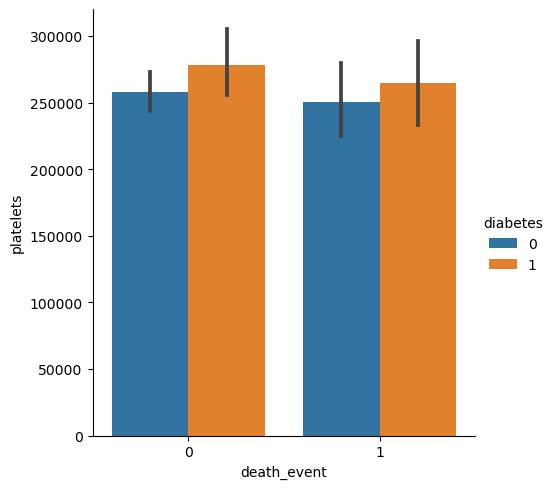

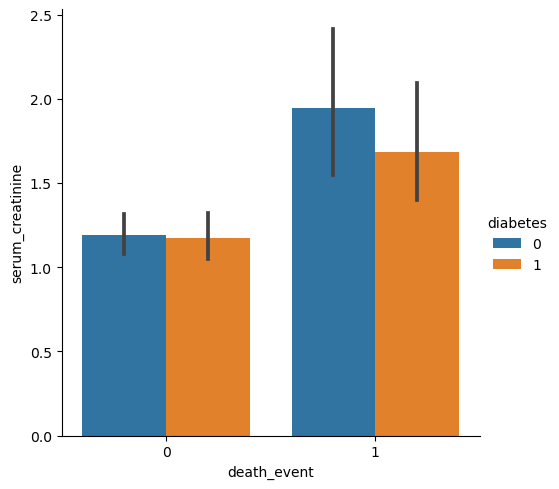

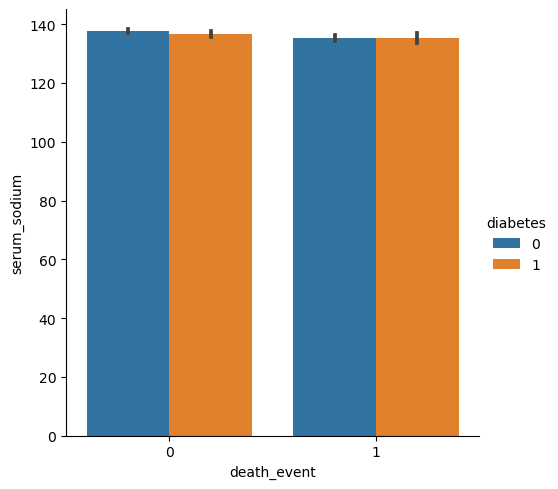

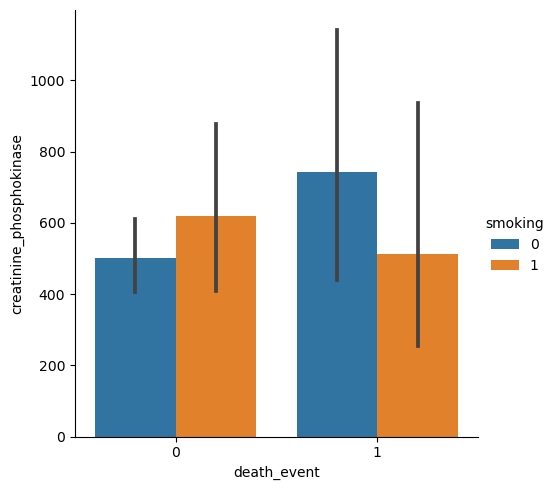

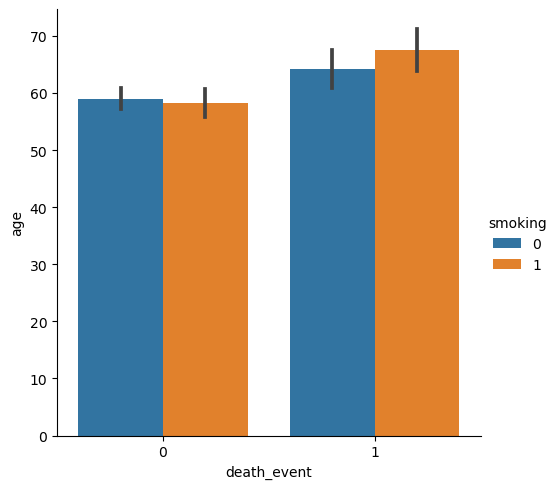

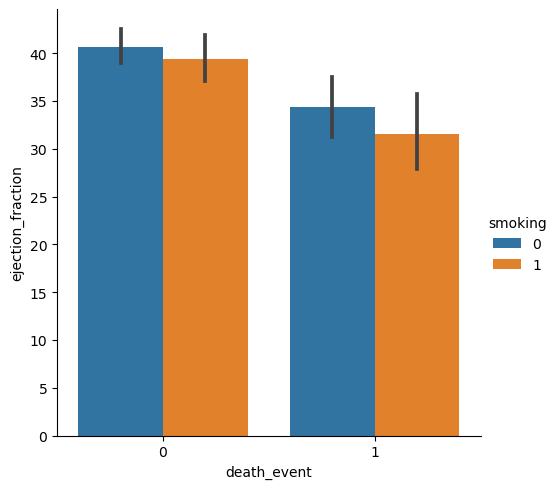

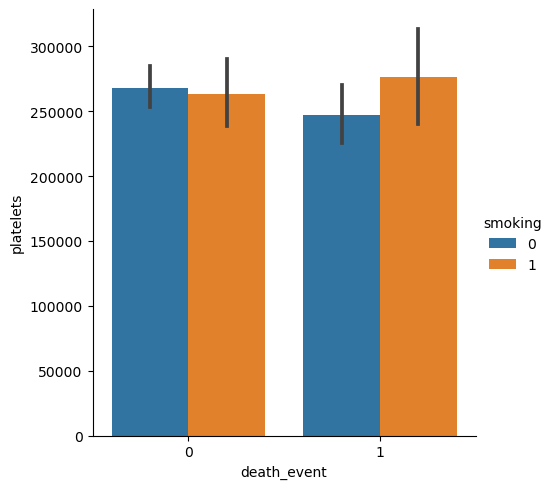

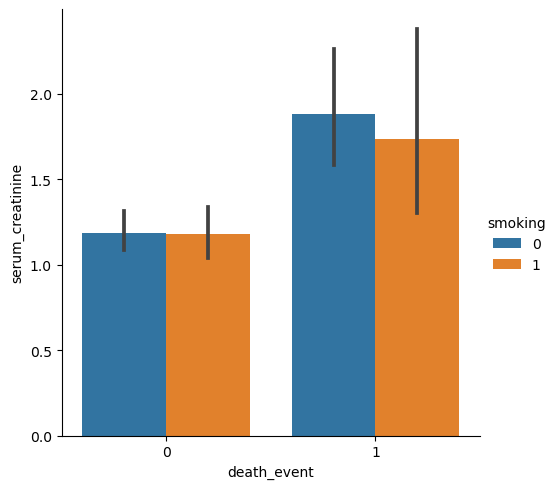

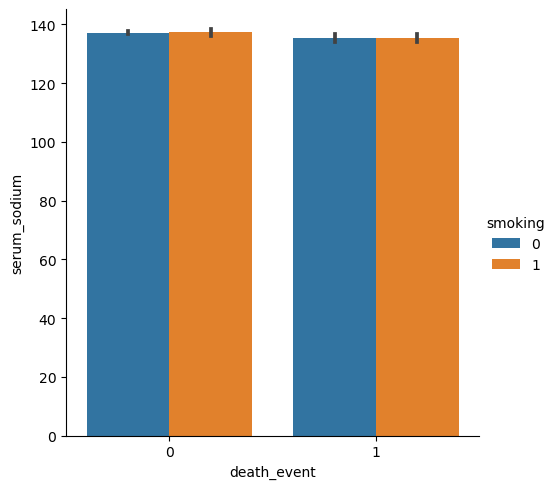

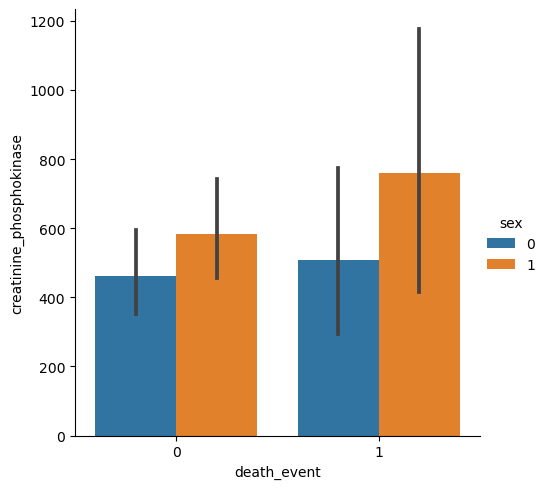

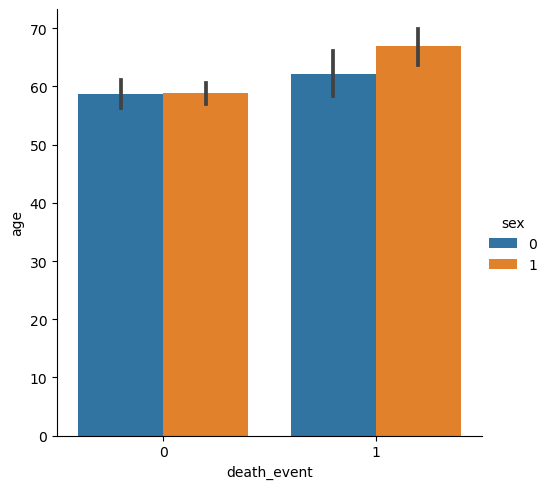

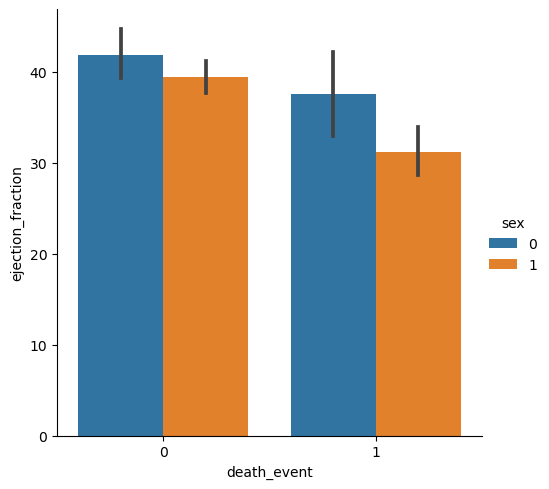

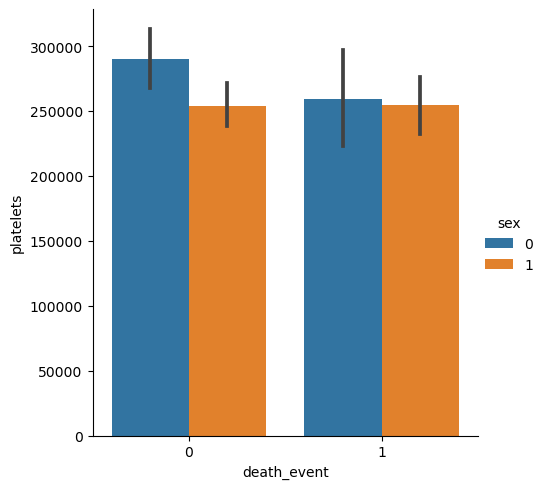

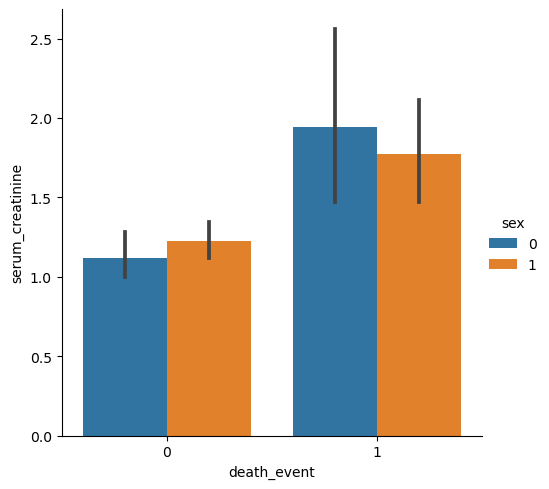

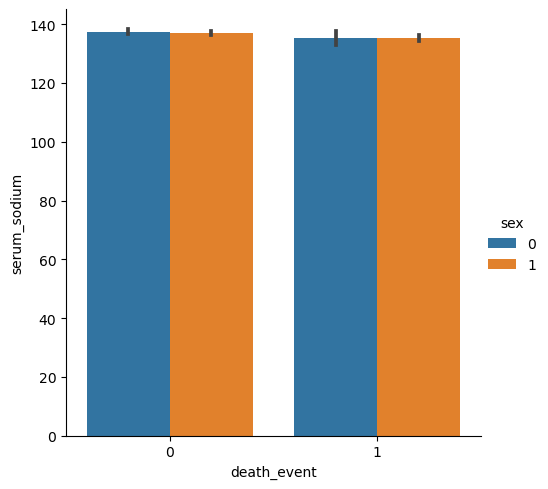

In [21]:
cat=['anaemia','diabetes','smoking','sex']
con=['creatinine_phosphokinase','age','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for x in cat:
  for y in con:
      sns.catplot(x='death_event',y=y,hue=x,kind='bar',data=df_eda)

# Feature Engineering

In [22]:
# ambil data inference
inf = df_eda.sample(10, random_state=30) 
inf 

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
13   72.0        0                       211         0                 25   
246  42.0        0                        64         0                 40   
35   49.0        0                       972         1                 35   
139  59.0        1                       176         1                 25   
222  58.0        0                       132         1                 38   
200  50.0        1                       298         0                 35   
233  42.0        0                       102         1                 40   
250  55.0        1                       170         1                 40   
273  79.0        1                        55         0                 50   
158  52.0        0                       132         0                 30   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
13                     0   274000.0               1.2           134    0   
246                    0   189000.0               0.7           140    1   
35                     1   268000.0               0.8           130    0   
139                    0   221000.0               1.0           136    1   
222                    1   253000.0               1.0           139    1   
200                    0   362000.0               0.9           140    1   
233                    0   237000.0               1.2           140    1   
250                    0   336000.0               1.2           135    1   
273                    1   172000.0               1.8           133    1   
158                    0   218000.0               0.7           136    1   

     smoking  time  death_event  
13         0   207            0  
246        0   245            0  
35         0   187            0  
139        1   150            1  
222        0   230            0  
200        1   240            0  
233        0    74            0  
250        0   250            0  
273        0    78            0  
158        1   112            0

In [23]:
# drop inference dari dataset

df_eda = df_eda.drop(inf.index)
df_eda

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    42.0        1                       250         1                 15   
1    46.0        0                       168         1                 17   
2    65.0        1                       160         1                 20   
3    53.0        1                        91         0                 20   
4    50.0        1                       582         1                 20   
..    ...      ...                       ...       ...                ...   
294  63.0        1                       122         1                 60   
295  45.0        0                       308         1                 60   
296  70.0        0                        97         0                 60   
297  53.0        1                       446         0                 60   
298  50.0        0                       582         0                 62   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      0  213000.00               1.3           136    0   
1                      1  271000.00               2.1           124    0   
2                      0  327000.00               2.7           116    0   
3                      1  418000.00               1.4           139    0   
4                      1  279000.00               1.0           134    0   
..                   ...        ...               ...           ...  ...   
294                    0  267000.00               1.2           145    1   
295                    1  377000.00               1.0           136    1   
296                    1  220000.00               0.9           138    1   
297                    1  263358.03               1.0           139    1   
298                    1  147000.00               0.8           140    1   

     smoking  time  death_event  
0          0    65            1  
1          0   100            1  
2          0     8            1  
3          0    43            1  
4          0   186            0  
..       ...   ...          ...  
294        0   147            0  
295        0   186            0  
296        0   186            0  
297        0   215            0  
298        1   192            0  

[289 rows x 13 columns]

In [24]:
# reset index

df_eda.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)
inf

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  72.0        0                       211         0                 25   
1  42.0        0                        64         0                 40   
2  49.0        0                       972         1                 35   
3  59.0        1                       176         1                 25   
4  58.0        0                       132         1                 38   
5  50.0        1                       298         0                 35   
6  42.0        0                       102         1                 40   
7  55.0        1                       170         1                 40   
8  79.0        1                        55         0                 50   
9  52.0        0                       132         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   274000.0               1.2           134    0   
1                    0   189000.0               0.7           140    1   
2                    1   268000.0               0.8           130    0   
3                    0   221000.0               1.0           136    1   
4                    1   253000.0               1.0           139    1   
5                    0   362000.0               0.9           140    1   
6                    0   237000.0               1.2           140    1   
7                    0   336000.0               1.2           135    1   
8                    1   172000.0               1.8           133    1   
9                    0   218000.0               0.7           136    1   

   smoking  time  death_event  
0        0   207            0  
1        0   245            0  
2        0   187            0  
3        1   150            1  
4        0   230            0  
5        1   240            0  
6        0    74            0  
7        0   250            0  
8        0    78            0  
9        1   112            0

## Data Splitting

In [25]:
# split
X = df_eda.drop('death_event', axis=1)
y = df_eda.death_event

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(231, 12)
(58, 12)
(231,)
(58,)


## Feature Selection

In [26]:
X = X.copy()  # fitur
y = y.copy()  # target

# selectkbest dengan function chi2
k = 'all'  # jumlah fitur
selector = SelectKBest(score_func=chi2, k=k)

# buat variabel baru untuk menyimpan hasil selectkbest
X_baru = selector.fit_transform(X, y)

# ambil index
index = selector.get_support(indices=True)
feature_scores = selector.scores_
# Print feature names
selected_features = df_eda.columns[index].tolist()

print("Selected features:", selected_features)
print("Feature scores:", feature_scores)


Selected features: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
Feature scores: [4.23470132e+01 5.54270212e-01 1.57978379e+03 7.52441671e-03
 7.86304411e+01 1.32965274e+00 2.60177978e+04 1.93883573e+01
 1.66596955e+00 4.90376257e-04 1.20255077e-01 3.77549599e+03]


Berdasarkan analisa selectKbest, terlihat fitur mana yang harus dipilih. sebelum itu, ada baiknya di cek vif multicolinearity nya dahulu supaya model lebih valid.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_num = df_eda[['age', 'creatinine_phosphokinase', 'ejection_fraction',
                    'platelets', 'serum_creatinine', 'time', 'serum_sodium']]

def calc_vif(X):

    # hitung VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
calc_vif(data_num)

variables        VIF
0                       age  28.891087
1  creatinine_phosphokinase   1.385313
2         ejection_fraction  11.663433
3                 platelets   8.218574
4          serum_creatinine   2.877972
5                      time   4.029306
6              serum_sodium  52.366216

Dari kedua analisis, akhirnya terpilih kolom kolom yang dapat dijadikan fitur. Kolom kolomnya adalah anaemia, creatinine_phosphokinase, diabetes, high_blood_pressure, serum_creatinine, dan time karena secara linear, time masih berkorelasi dan tidak memiliki skor VIF yang tinggi

Setelah feature slection, akan dilakukan cek outlier dan langsung di handle jika memang ada.

In [29]:
def plot_fitur(data, variable):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

     # histogram
    sns.histplot(data[variable],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{variable}'")
    axes[0].axvline(data[variable].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(data[variable].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()


     # boxplot
    sns.boxplot(y=data[variable], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{variable}'")

    plt.show()

    # skewness
    print(data[variable].name + ' Kurtosis: ' + str(data[variable].kurt()))
    print(data[variable].name + ' Skewness: ' + str(data[variable].skew()))
    if -0.5 <= data[variable].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(variable))
    elif data[variable].skew() > 0.5:
        print("Columns '{}' right skewed".format(variable))
    elif data[variable].skew() < -0.5:
        print("Columns '{}' left skewed".format(variable))

    print(data[variable].mean())
    print(data[variable].median())
    print(data[variable].mode())

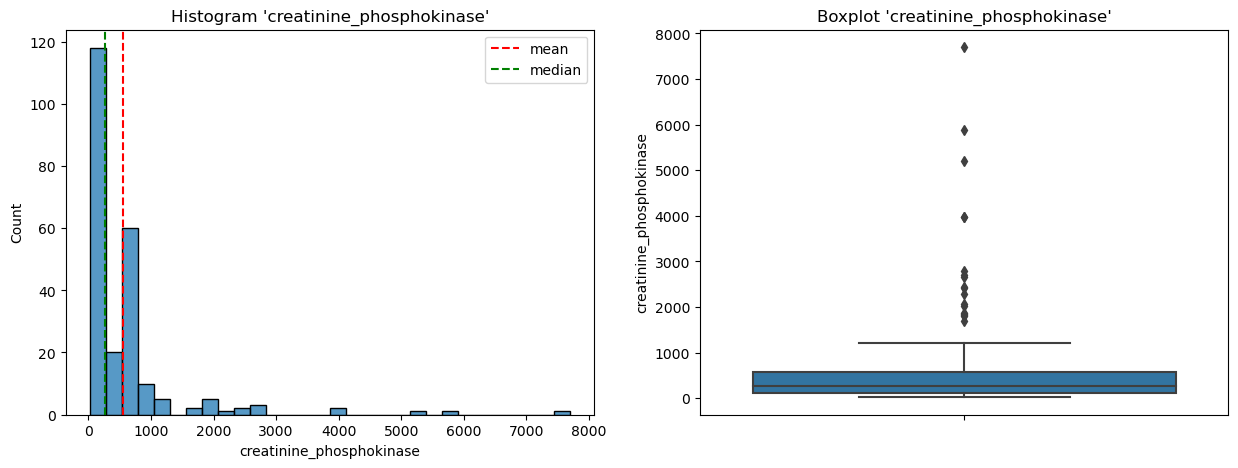

creatinine_phosphokinase Kurtosis: 25.8864265697024
creatinine_phosphokinase Skewness: 4.506158627224996
Columns 'creatinine_phosphokinase' right skewed
557.1125541125541
258.0
0    582
Name: creatinine_phosphokinase, dtype: int64


In [30]:
plot_fitur(X_train, 'creatinine_phosphokinase')

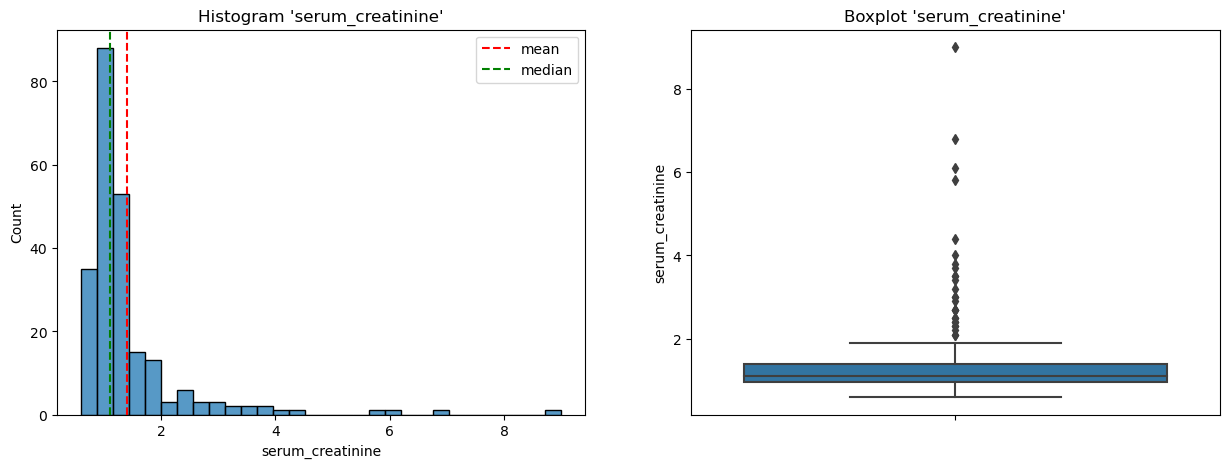

serum_creatinine Kurtosis: 21.752253093231637
serum_creatinine Skewness: 4.05181984078609
Columns 'serum_creatinine' right skewed
1.4061471861471861
1.1
0    1.0
Name: serum_creatinine, dtype: float64


In [31]:
plot_fitur(X_train, 'serum_creatinine')

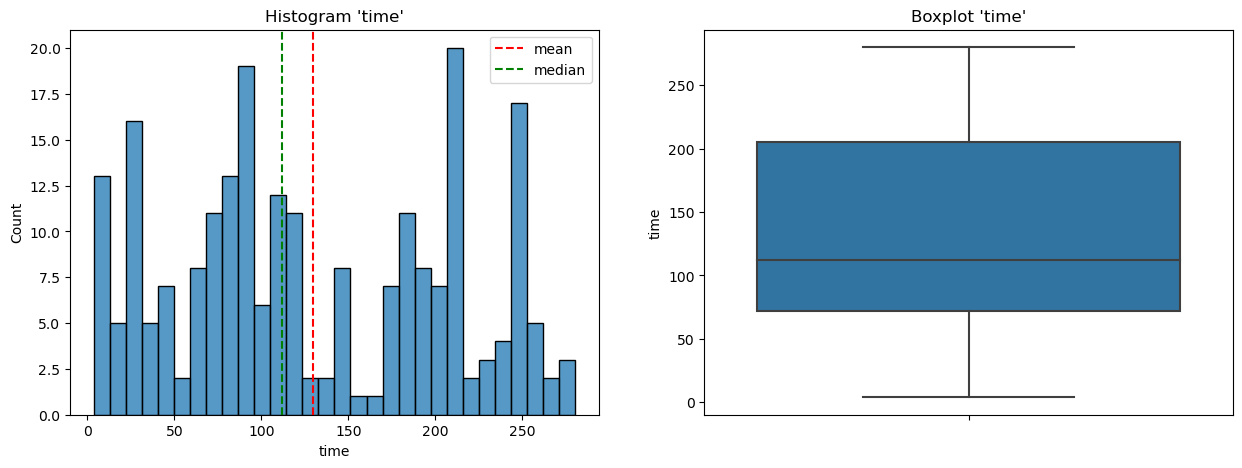

time Kurtosis: -1.2569187442285428
time Skewness: 0.1496433083415178
Columns 'time' normal distribution
129.6103896103896
112.0
0     10
1     30
2     87
3    209
4    244
5    250
Name: time, dtype: int64


In [32]:
plot_fitur(X_train, 'time')

Berhubung dari semua fitur numerik yang memiliki outlier skew nya lebih dari 1, maka akan di handle dengan capping dengan range 3.

In [33]:
# Deteksi outlier bill_amt_sep dengan IQR
Q3 = X_train['serum_creatinine'].quantile(.75)
Q1 = X_train['serum_creatinine'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = X_train[(X_train['serum_creatinine'] > upper) | (X_train['serum_creatinine'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/X_train.shape[0] * 100, '%')

count of outlier:  15
percentage of outlier:  6.493506493506493 %


In [34]:
# Deteksi outlier creatinine_phosphokinase dengan IQR
Q3 = X_train['creatinine_phosphokinase'].quantile(.75)
Q1 = X_train['creatinine_phosphokinase'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = X_train[(X_train['creatinine_phosphokinase'] > upper) | (X_train['creatinine_phosphokinase'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/X_train.shape[0] * 100, '%')

count of outlier:  13
percentage of outlier:  5.627705627705628 %


In [35]:
# hitung outlier dengan capping sesuai range iqr
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['creatinine_phosphokinase','serum_creatinine'])
wins.fit(X_train)
X_train_cleaned = wins.transform(X_train) 

Selanjutnya akan di cek perubahan datanya setelah handling outlier.

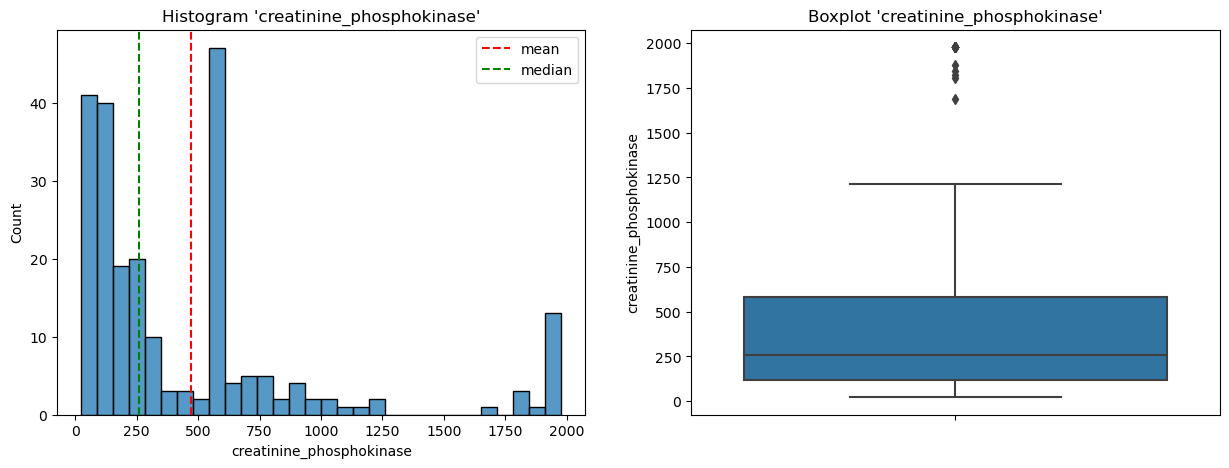

creatinine_phosphokinase Kurtosis: 2.9511810274529866
creatinine_phosphokinase Skewness: 1.8523633657565894
Columns 'creatinine_phosphokinase' right skewed
468.9718614718615
258.0
0    582.0
Name: creatinine_phosphokinase, dtype: float64


In [36]:
plot_fitur(X_train_cleaned, 'creatinine_phosphokinase')

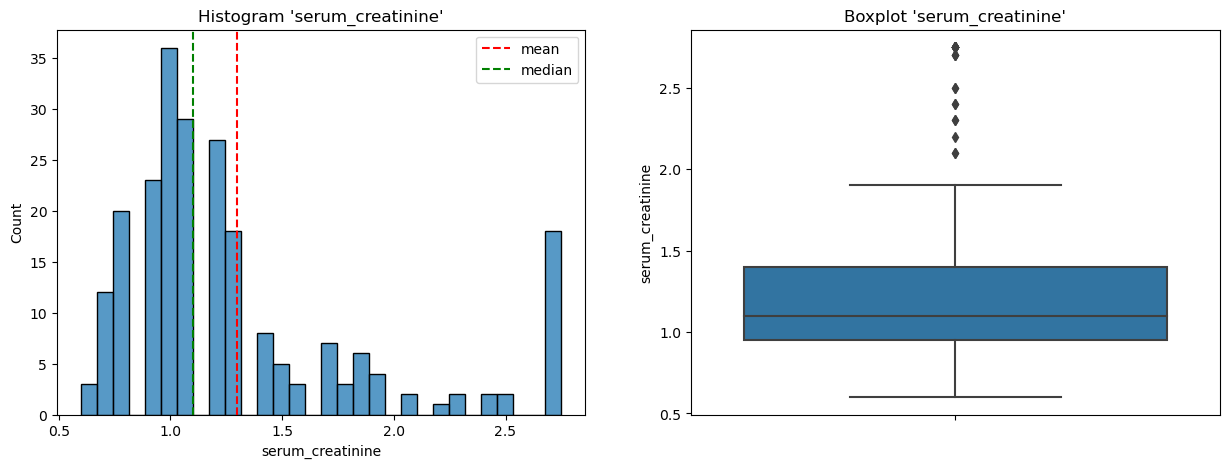

serum_creatinine Kurtosis: 1.3238482148399884
serum_creatinine Skewness: 1.4672196303459524
Columns 'serum_creatinine' right skewed
1.2985714285714287
1.1
0    1.0
Name: serum_creatinine, dtype: float64


In [37]:
plot_fitur(X_train_cleaned, 'serum_creatinine')

Setelah dihandle datanya, terlihat sudah tidak ada outlier karena sudah ditarik ke ujung batasnya. Jika masih ada, tidak apa karena masih didalam range yang bisa di toleransi.

# Pipeline Definition

In [38]:
# pisah numerik dan kategorik
num_col_out = ['serum_creatinine','creatinine_phosphokinase']
num_col = ['time']
cat_col = ['anaemia','diabetes', 'high_blood_pressure']

In [39]:
num_pipeline1 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', MinMaxScaler())
    ])

num_tr1 = num_pipeline1.fit_transform(X_train[['serum_creatinine','creatinine_phosphokinase']])
num_tr1

array([[1.        , 0.28586039],
       [0.23255814, 0.28586039],
       [0.46511628, 0.28586039],
       [0.18604651, 0.11608284],
       [0.18604651, 0.02301202],
       [1.        , 0.        ],
       [0.18604651, 0.44694452],
       [0.3255814 , 0.02965993],
       [0.18604651, 0.2833035 ],
       [0.23255814, 0.05420609],
       [0.27906977, 0.91894656],
       [0.88372093, 0.02710304],
       [0.09302326, 0.01585272],
       [0.13953488, 0.59422143],
       [0.23255814, 0.0490923 ],
       [0.18604651, 0.30733828],
       [0.04651163, 0.323191  ],
       [0.23255814, 0.28892866],
       [0.27906977, 0.11403733],
       [0.04651163, 0.91281002],
       [0.23255814, 0.14932242],
       [0.18604651, 1.        ],
       [0.13953488, 0.01840961],
       [1.        , 1.        ],
       [0.09302326, 0.07363846],
       [0.18604651, 0.03681923],
       [0.13953488, 0.05420609],
       [1.        , 0.01840961],
       [0.23255814, 0.28586039],
       [0.09302326, 0.28074661],
       [0.

In [40]:
num_pipeline2 = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler())
    ])

num_tr2 = num_pipeline2.fit_transform(X_train[['time']])
num_tr2

array([[-0.42600831],
       [ 1.00625534],
       [ 1.44987682],
       [-0.12181072],
       [-0.43868321],
       [-1.28790148],
       [-0.62880671],
       [ 1.04428004],
       [-1.09777799],
       [-0.10913582],
       [ 1.79209911],
       [-0.66683141],
       [ 1.52592622],
       [ 1.05695494],
       [ 1.00625534],
       [ 1.06962984],
       [ 1.31045293],
       [-1.22452699],
       [-1.51604968],
       [-0.29925932],
       [-1.51604968],
       [ 0.72740755],
       [-0.28658442],
       [-1.09777799],
       [ 0.71473265],
       [ 0.20773667],
       [ 1.00625534],
       [ 0.72740755],
       [ 1.47522662],
       [ 1.08230474],
       [-0.8189302 ],
       [-0.28658442],
       [-0.41333341],
       [-1.55407438],
       [ 0.89218124],
       [-0.32460912],
       [-0.54008241],
       [-1.45267518],
       [ 1.44987682],
       [-0.21053502],
       [-1.45267518],
       [-0.7048561 ],
       [-0.717531  ],
       [-1.51604968],
       [ 1.01893024],
       [-0

In [41]:
#membuat variabel berisi fungsi pipeline untuk categorical feature
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),

    ])

cat_tr = cat_pipeline.fit_transform(X_train[['anaemia', 'high_blood_pressure', 'diabetes']])
cat_tr

array([[0, 0, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 1],
       [1, 1, 0],
       [1, 1, 0],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [0, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 1, 0],
       [1, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 1, 0],
       [0, 0, 1],
       [1, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 1, 0],
       [0,

In [42]:
# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("numerikout", num_pipeline1, ['serum_creatinine','creatinine_phosphokinase']),
        ("numerik", num_pipeline2, ['time']),
        ("kategorik",cat_pipeline, ['anaemia', 'high_blood_pressure', 'diabetes'])
        ])

# Modelling

### Model Definition

In [43]:
# random forest
rfpipe = Pipeline([("preprocess", preprocessor), ("rf", RandomForestClassifier(random_state= 69))])

In [44]:
# cross validation random forest
kf=KFold(n_splits=10)
scoreRF_train = cross_val_score(rfpipe, X_train, y_train,scoring = "f1", cv=kf)

print("Cross Validation array           :",scoreRF_train)
print("Cross Validation score           :",scoreRF_train.mean())
print("Std Dev Cross Validation         :",scoreRF_train.std())

Cross Validation array           : [0.85714286 0.77777778 0.63157895 0.6        0.5        0.57142857
 0.88888889 0.75       0.73684211 0.75      ]
Cross Validation score           : 0.7063659147869673
Std Dev Cross Validation         : 0.11982754996674694


In [45]:
# XGboost
xgpipe =Pipeline([("preprocess",preprocessor), 
                  ("xgb", xgb.XGBRFClassifier(random_state=69))
                  ])

In [46]:
# cross validation XGBoost
kf=KFold(n_splits=10)
scoreXG_train = cross_val_score(xgpipe, X_train, y_train,scoring = "f1", cv=kf)

print("Cross Validation array           :",scoreXG_train)
print("Cross Validation score           :",scoreXG_train.mean())
print("Std Dev Cross Validation         :",scoreXG_train.std())

Cross Validation array           : [0.85714286 0.82352941 0.6        0.6        0.5        0.66666667
 1.         0.53333333 0.73684211 0.75      ]
Cross Validation score           : 0.706751437417072
Std Dev Cross Validation         : 0.14907843695823308


Dari baseline model terlihat bahwa Random Forest memiliki skor f1 yang lebih tinggi. Namun XGBoost memiliki standar deviasi yang lebih kecil.

### Model Training & Hyperparameter Tuning

**Random Forest**

In [47]:
# training rf
modelRF = rfpipe.fit(X_train,y_train)
modelRF

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerikout',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['serum_creatinine',
                                                   'creatinine_phosphokinase']),
                                                 ('numerik',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['time']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['anaemia',
                                                   'high_blood_pressure',
                                                   'diabetes'])])),
                ('rf', RandomForestClassifier(random_state=69))])

In [48]:
param_grid = {
    'rf__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'rf__max_depth': [None, 5, 10],  # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [49]:
grid_search = GridSearchCV(modelRF, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerikout',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     tail='both')),
                                                                                         ('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['serum_creatinine',
                                                                          'creatinine_phosphokinase']),
                                                                        ('numerik',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Simpl...
                                                                                          StandardScaler())]),
                                                                         ['time']),
                                                                        ('kategorik',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['anaemia',
                                                                          'high_blood_pressure',
                                                                          'diabetes'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=69))]),
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='f1')

In [50]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [51]:
print(best_params)
print(best_score)

{'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
0.6995357583592878


In [52]:
# mencari best estimator
modelRF_gridsearchCV = grid_search.best_estimator_
modelRF_gridsearchCV

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerikout',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['serum_creatinine',
                                                   'creatinine_phosphokinase']),
                                                 ('numerik',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['time']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['anaemia',
                                                   'high_blood_pressure',
                                                   'diabetes'])])),
                ('rf',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        random_state=69))])

In [53]:
# cross validation setelah tuning
scores = cross_val_score(modelRF_gridsearchCV, X_train, y_train,scoring='f1', cv=10)
print("Cross Validation Score modelRF_gridsearchCV array   :",scores)
print("Cross Validation Score modelRF_gridsearchCV         : {:.2f}".format(grid_search.best_score_))
print("Std dev Cross Validation modelRF_gridsearchCV       : {:.2f}".format(grid_search.best_score_.std()))

Cross Validation Score modelRF_gridsearchCV array   : [0.85714286 0.82352941 0.66666667 0.54545455 0.66666667 0.71428571
 0.76923077 0.57142857 0.66666667 0.71428571]
Cross Validation Score modelRF_gridsearchCV         : 0.70
Std dev Cross Validation modelRF_gridsearchCV       : 0.00


**XGBOOST**

In [54]:
# training xgboost
modelXG = xgpipe.fit(X_train,y_train)
modelXG

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerikout',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['serum_creatinine',
                                                   'creatinine_phosphokinase']),
                                                 ('numerik',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequ...
                                 grow_policy=None, importance_type=None,
                                 interaction_constraints=None, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=None,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 n_estimators=100, n_jobs=None,
                                 num_parallel_tree=None,
                                 objective='binary:logistic', predictor=None,
                                 random_state=69, reg_alpha=None, ...))])

In [55]:
params = {
    'xgb__n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'xgb__max_depth': [3, 5, 7],  # Maximum depth of a tree
    'xgb__learning_rate': [0.1, 0.01, 0.001],  # Learning rate for boosting
    'xgb__subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'xgb__colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
}

In [56]:
grid_searchxg = GridSearchCV(modelXG, params, cv=10, scoring='f1')
grid_searchxg.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerikout',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     tail='both')),
                                                                                         ('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['serum_creatinine',
                                                                          'creatinine_phosphokinase']),
                                                                        ('numerik',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Simpl...
                                                        missing=nan,
                                                        monotone_constraints=None,
                                                        n_estimators=100,
                                                        n_jobs=None,
                                                        num_parallel_tree=None,
                                                        objective='binary:logistic',
                                                        predictor=None,
                                                        random_state=69,
                                                        reg_alpha=None, ...))]),
             param_grid={'xgb__colsample_bytree': [0.8, 1.0],
                         'xgb__learning_rate': [0.1, 0.01, 0.001],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [100, 200, 300],
                         'xgb__subsample': [0.8, 1.0]},
             scoring='f1')

In [57]:
# mencari best estimator
modelXG_gridsearchCV = grid_searchxg.best_estimator_
modelXG_gridsearchCV

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerikout',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['serum_creatinine',
                                                   'creatinine_phosphokinase']),
                                                 ('numerik',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequ...
                                 grow_policy=None, importance_type=None,
                                 interaction_constraints=None,
                                 learning_rate=0.1, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=7,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 n_estimators=200, n_jobs=None,
                                 num_parallel_tree=None,
                                 objective='binary:logistic', predictor=None,
                                 random_state=69, ...))])

In [58]:
# cross validation setelah tuning
scores = cross_val_score(modelXG_gridsearchCV, X_train, y_train,scoring='f1', cv=10)
print("Cross Validation Score modelXG_gridearchCV         : {:.2f}".format(grid_searchxg.best_score_))
print("Std dev Cross Validation modelXG_gridsearchCV       : {:.2f}".format(grid_searchxg.best_score_.std()))

Cross Validation Score modelXG_gridearchCV         : 0.71
Std dev Cross Validation modelXG_gridsearchCV       : 0.00


# Model Evaluation

### Model Evaluation Random Forest

In [59]:
# performance random forest
y_pred_train_RFC = modelRF.predict(X_train)
y_pred_test_RFC = modelRF.predict(X_test)
print('f1 score train : ',f1_score(y_train,y_pred_train_RFC))
print('f1 score test : ',f1_score(y_test,y_pred_test_RFC))

f1 score train :  1.0
f1 score test :  0.8108108108108109


In [60]:
# performance rf grid search
y_pred_train_rf_gridsearchCV = modelRF_gridsearchCV.predict(X_train)
y_pred_test_rf_gridsearchCV = modelRF_gridsearchCV.predict(X_test)
print('f1 score train : ',f1_score(y_train,y_pred_train_rf_gridsearchCV))
print('f1 score test : ',f1_score(y_test,y_pred_test_rf_gridsearchCV))

f1 score train :  0.9103448275862069
f1 score test :  0.8421052631578947


confusion matrix Random Forest Train Set


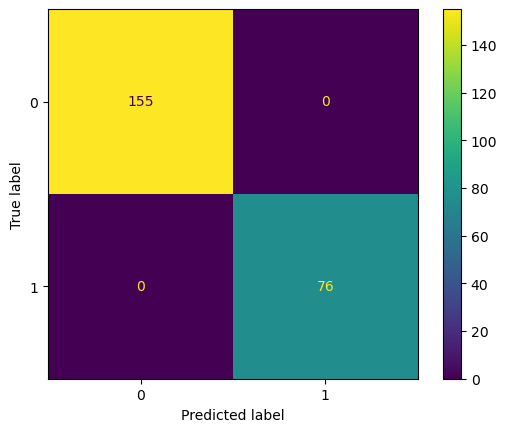

                                           
confusion matrix Random Forest Test Set


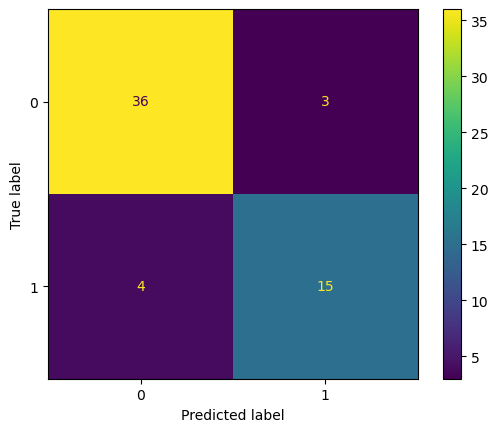

confusion matrix RFGS Train Set


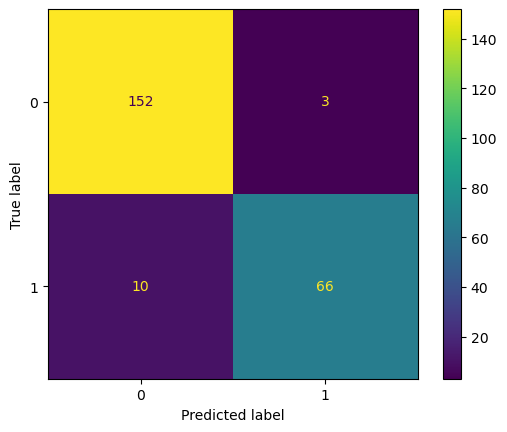

                                           
confusion matrix RFGS Test Set


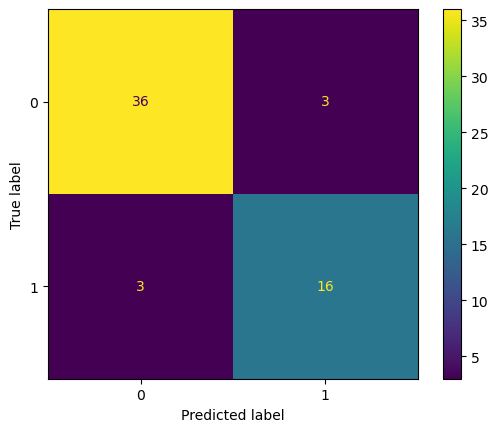

In [61]:
# confusion matrix random forest
print('confusion matrix Random Forest Train Set')
rf = confusion_matrix(y_train,y_pred_train_RFC, labels=modelRF.classes_)
disprf = ConfusionMatrixDisplay(confusion_matrix=rf,display_labels=modelRF.classes_)
disprf.plot()
plt.show()
print('                                           ')
print('confusion matrix Random Forest Test Set')
rf2 = confusion_matrix(y_test,y_pred_test_RFC, labels=modelRF.classes_)
disprf2 = ConfusionMatrixDisplay(confusion_matrix=rf2,display_labels=modelRF.classes_)
disprf2.plot()
plt.show()
# confusion matrix random forest grid search
print('confusion matrix RFGS Train Set')
rf3 = confusion_matrix(y_train,y_pred_train_rf_gridsearchCV, labels=modelRF_gridsearchCV.classes_)
disprf3 = ConfusionMatrixDisplay(confusion_matrix=rf3,display_labels=modelRF_gridsearchCV.classes_)
disprf3.plot()
plt.show()
print('                                           ')
print('confusion matrix RFGS Test Set')
rf4 = confusion_matrix(y_test,y_pred_test_rf_gridsearchCV, labels=modelRF_gridsearchCV.classes_)
disprf4 = ConfusionMatrixDisplay(confusion_matrix=rf4,display_labels=modelRF_gridsearchCV.classes_)
disprf4.plot()
plt.show()

In [62]:
# classification report RF
print('classification report RF Train Set')
print(classification_report(y_train,y_pred_train_RFC))
print('                                  ')
print('classification report RF Test Set')
print(classification_report(y_test,y_pred_test_RFC))

classification report RF Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        76

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

                                  
classification report RF Test Set
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.83      0.79      0.81        19

    accuracy                           0.88        58
   macro avg       0.87      0.86      0.86        58
weighted avg       0.88      0.88      0.88        58



In [63]:
# classification report RFGS
print('classification report RFGS Train Set')
print(classification_report(y_train,y_pred_train_rf_gridsearchCV))
print('                                  ')
print('classification report RFGS Test Set')
print(classification_report(y_test,y_pred_test_rf_gridsearchCV))

classification report RFGS Train Set
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       155
           1       0.96      0.87      0.91        76

    accuracy                           0.94       231
   macro avg       0.95      0.92      0.93       231
weighted avg       0.94      0.94      0.94       231

                                  
classification report RFGS Test Set
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.84      0.84      0.84        19

    accuracy                           0.90        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.90      0.90      0.90        58



### Model Evaluation XGBoost

In [64]:
# performance XGBoost
y_pred_train_XGB = modelXG.predict(X_train)
y_pred_test_XGB = modelXG.predict(X_test)
print('f1 score train : ',f1_score(y_train,y_pred_train_XGB))
print('f1 score test : ',f1_score(y_test,y_pred_test_XGB))

f1 score train :  0.8571428571428571
f1 score test :  0.8717948717948718


In [65]:
# performance XGBoost GridSearch
y_pred_train_XGB_gridsearchCV = modelXG_gridsearchCV.predict(X_train)
y_pred_test_XGB_gridsearchCV = modelXG_gridsearchCV.predict(X_test)
print('f1 score train : ',f1_score(y_train,y_pred_train_XGB_gridsearchCV))
print('f1 score test : ',f1_score(y_test,y_pred_test_XGB_gridsearchCV))

f1 score train :  0.8666666666666667
f1 score test :  0.8421052631578947


confusion matrix XGBoost Train Set


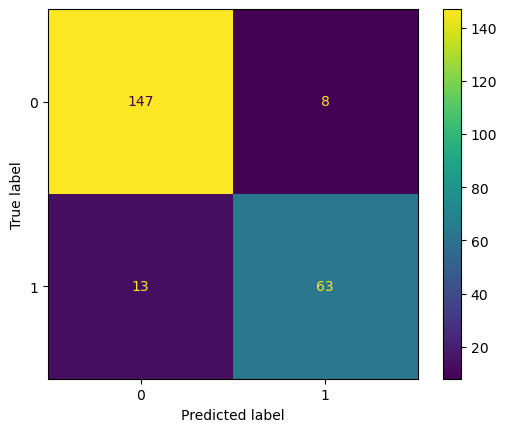

                                           
confusion matrix XGBoost Test Set


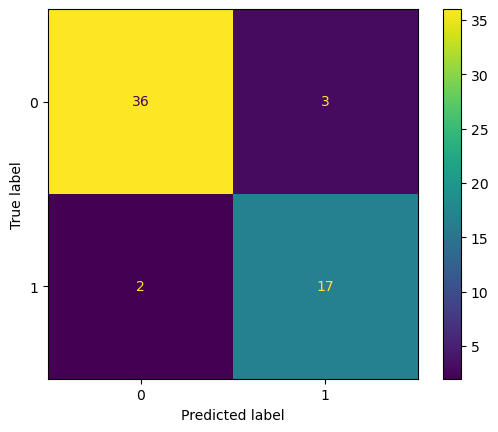

confusion matrix XGBGS Train Set


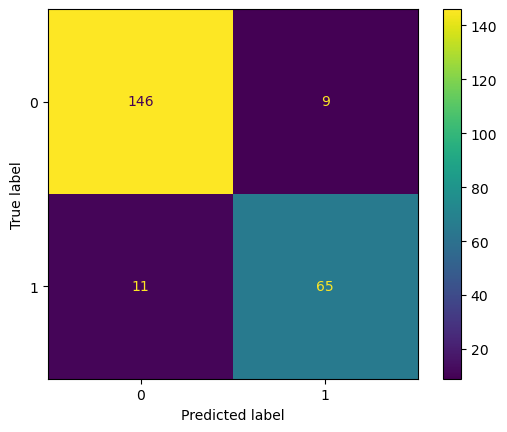

                                           
confusion matrix XGBGS Test Set


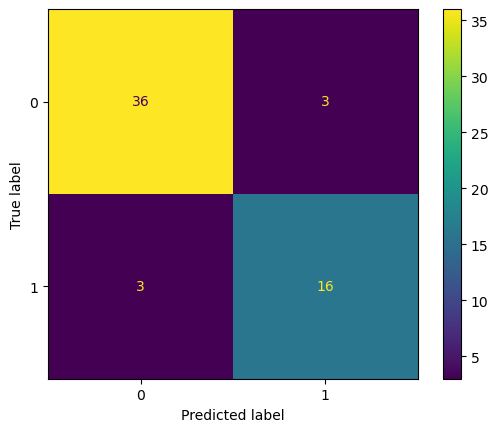

In [66]:
# confusion matrix XGB
print('confusion matrix XGBoost Train Set')
xg = confusion_matrix(y_train,y_pred_train_XGB, labels=modelXG.classes_)
dispxg = ConfusionMatrixDisplay(confusion_matrix=xg,display_labels=modelXG.classes_)
dispxg.plot()
plt.show()
print('                                           ')
print('confusion matrix XGBoost Test Set')
xg2 = confusion_matrix(y_test,y_pred_test_XGB, labels=modelXG.classes_)
dispxg2 = ConfusionMatrixDisplay(confusion_matrix=xg2,display_labels=modelXG.classes_)
dispxg2.plot()
plt.show()
# confusion matrix XGB grid search
print('confusion matrix XGBGS Train Set')
xg3 = confusion_matrix(y_train,y_pred_train_XGB_gridsearchCV, labels=modelXG_gridsearchCV.classes_)
dispxg3 = ConfusionMatrixDisplay(confusion_matrix=xg3,display_labels=modelXG_gridsearchCV.classes_)
dispxg3.plot()
plt.show()
print('                                           ')
print('confusion matrix XGBGS Test Set')
xg4 = confusion_matrix(y_test,y_pred_test_XGB_gridsearchCV, labels=modelXG_gridsearchCV.classes_)
dispxg4 = ConfusionMatrixDisplay(confusion_matrix=xg4,display_labels=modelXG_gridsearchCV.classes_)
dispxg4.plot()
plt.show()

In [67]:
# classification report XGBoost
print('classification report XGBoost Train Set')
print(classification_report(y_train,y_pred_train_XGB))
print('                                  ')
print('classification report XGBoost Test Set')
print(classification_report(y_test,y_pred_test_XGB))

classification report XGBoost Train Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       155
           1       0.89      0.83      0.86        76

    accuracy                           0.91       231
   macro avg       0.90      0.89      0.90       231
weighted avg       0.91      0.91      0.91       231

                                  
classification report XGBoost Test Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.85      0.89      0.87        19

    accuracy                           0.91        58
   macro avg       0.90      0.91      0.90        58
weighted avg       0.92      0.91      0.91        58



In [68]:
# classification report XGBoost GS
print('classification report XGBoostGS Train Set')
print(classification_report(y_train,y_pred_train_XGB_gridsearchCV))
print('                                  ')
print('classification report XGBoostGS Test Set')
print(classification_report(y_test,y_pred_test_XGB_gridsearchCV))

classification report XGBoostGS Train Set
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       155
           1       0.88      0.86      0.87        76

    accuracy                           0.91       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.91      0.91      0.91       231

                                  
classification report XGBoostGS Test Set
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.84      0.84      0.84        19

    accuracy                           0.90        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.90      0.90      0.90        58



Dari evaluasi masing-masing model, terlihat bahwa untuk model XGBoost adalah yang terbaik. Bahkan sebelum tuning. Secara model juga masih goodfit. Pengukurannya menggunakan metrik f1-score. Pemilihannya karena kita masih belum tahu apa yang lebih penting. Untuk pemilihannya berdasarkan kedua kategori false negative dan false positive sama-sama tidak diinginkan. Ketika seseorang diprediksi meninggal, walaupun bisa sehat-sehat saja, mental pasien akan jatuh dan akan menambah masalah baru. Ketika orang yang diprediksi sehat tetapi ternyata akan meninggal, kasihan karena pihak keluarga juga tidak bersiap-siap untuk ditinggal oleh yang bersangkutan. Oleh karena itu, metrik f1-score lah yang dipilih. Jika kita tinjau kembali, skor yang ddidapatkan di sekitar 0.86. Ini sudah cukup baik mengingat datanya juga imbalance. Pada dasarnya semua model tidak memiliki oerforma yang buruk. Hanya saja, pada machine learning, hal yang difokuskan adalah apakah modelnya bestfit.

# Conclusion

Kesimpulan yang dapat diambil dari pengerjaan model ini adalah model bisa terwujud dengan akurasi yang cukup tinggi. Insight yang didapatkan juga cukup banyak. Pengguna bisa memanfaatkan model untuk memprediksi pasien-pasien yang sekiranya tidak tertolong untuk diusahakan mendapatkan pertolongan lebih. Mulai dari kecepatan, ketepatan, ketelitian, dan sebagainya dibutuhkan sekali pada keadaan darurat. Untuk menghindari itu semua, institusi kesehatan yang bersangkutan juga bisa mencoba untuk edukasi masyarakat mulai dari kelas atas hingga bawah mengenai penanganan orang sakit. Edukasi mengenai hidup sehat juga diperlukan disini. Institusi juga bisa mencoba menyebarluaskan pengetahuan mengenai kriteria tertentu yang hidupnya tidak akan lama. Memberi visualisasi yang jelas supaya sampai ke masyarakat yang keras kepala juga. Menariknya, untuk pasien-pasien yang perokok, model tidak menunjukan bahwa hal itu berhubungan. Beberapa model data yang terpikir berhubungan juga ternyata tidak. Disini juga saya menyimpulkan bahwa data ini masih kurang masuk akal.

# Inference

In [71]:
inf

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  72.0        0                       211         0                 25   
1  42.0        0                        64         0                 40   
2  49.0        0                       972         1                 35   
3  59.0        1                       176         1                 25   
4  58.0        0                       132         1                 38   
5  50.0        1                       298         0                 35   
6  42.0        0                       102         1                 40   
7  55.0        1                       170         1                 40   
8  79.0        1                        55         0                 50   
9  52.0        0                       132         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   274000.0               1.2           134    0   
1                    0   189000.0               0.7           140    1   
2                    1   268000.0               0.8           130    0   
3                    0   221000.0               1.0           136    1   
4                    1   253000.0               1.0           139    1   
5                    0   362000.0               0.9           140    1   
6                    0   237000.0               1.2           140    1   
7                    0   336000.0               1.2           135    1   
8                    1   172000.0               1.8           133    1   
9                    0   218000.0               0.7           136    1   

   smoking  time  death_event  
0        0   207            0  
1        0   245            0  
2        0   187            0  
3        1   150            1  
4        0   230            0  
5        1   240            0  
6        0    74            0  
7        0   250            0  
8        0    78            0  
9        1   112            0

In [77]:
inftest = inf[['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'serum_creatinine', 'time','death_event']]
inftest

anaemia  creatinine_phosphokinase  diabetes  high_blood_pressure  \
0        0                       211         0                    0   
1        0                        64         0                    0   
2        0                       972         1                    1   
3        1                       176         1                    0   
4        0                       132         1                    1   
5        1                       298         0                    0   
6        0                       102         1                    0   
7        1                       170         1                    0   
8        1                        55         0                    1   
9        0                       132         0                    0   

   serum_creatinine  time  death_event  
0               1.2   207            0  
1               0.7   245            0  
2               0.8   187            0  
3               1.0   150            1  
4               1.0   230            0  
5               0.9   240            0  
6               1.2    74            0  
7               1.2   250            0  
8               1.8    78            0  
9               0.7   112            0

In [73]:
# Random Forest data inference
y_pred_inf_RF = modelRF.predict(inf)
y_pred_inf_RF_test = pd.DataFrame(y_pred_inf_RF, columns=['RF'])
y_pred_inf_RF_test 

RF
0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   0

In [74]:
# Random Forest data inference
y_pred_inf_RFGS = modelRF_gridsearchCV.predict(inf)
y_pred_inf_RFGS_test = pd.DataFrame(y_pred_inf_RFGS, columns=['RFGS'])
y_pred_inf_RFGS_test 

RFGS
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0

In [75]:
# XGBOOST data inference
y_pred_inf_XG = modelXG.predict(inf)
y_pred_inf_XG_test = pd.DataFrame(y_pred_inf_XG, columns=['XG'])
y_pred_inf_XG_test 

XG
0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   0

In [76]:
# XGBOOSTGS data inference
y_pred_inf_XGGS = modelXG_gridsearchCV.predict(inf)
y_pred_inf_XGGS_test = pd.DataFrame(y_pred_inf_XG, columns=['XGGS'])
y_pred_inf_XGGS_test 

XGGS
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0

In [78]:
# Merge/combine scaling/encoder data with its predicted rank
inf_final=inftest
pd.concat([inf_final,y_pred_inf_RF_test,y_pred_inf_RFGS_test,y_pred_inf_XG_test,y_pred_inf_XGGS_test], axis=1)


anaemia  creatinine_phosphokinase  diabetes  high_blood_pressure  \
0        0                       211         0                    0   
1        0                        64         0                    0   
2        0                       972         1                    1   
3        1                       176         1                    0   
4        0                       132         1                    1   
5        1                       298         0                    0   
6        0                       102         1                    0   
7        1                       170         1                    0   
8        1                        55         0                    1   
9        0                       132         0                    0   

   serum_creatinine  time  death_event  RF  RFGS  XG  XGGS  
0               1.2   207            0   0     0   0     0  
1               0.7   245            0   0     0   0     0  
2               0.8   187            0   0     0   0     0  
3               1.0   150            1   0     0   0     0  
4               1.0   230            0   0     0   0     0  
5               0.9   240            0   0     0   0     0  
6               1.2    74            0   0     0   0     0  
7               1.2   250            0   0     0   0     0  
8               1.8    78            0   0     0   0     0  
9               0.7   112            0   0     0   0     0

# Model Saving

In [83]:
import pickle
models = {
    'model_xgboost': modelXG
}

with open('death_pred.pkl', 'wb') as f:
    pickle.dump(models, f)


# Conceptual Problems

Jelaskan latar belakang adanya bagging dan cara kerja bagging !

- Bagging adalah singkatan dari Bootstrap Aggregating. Fungsi nya adalah untuk menurunkan variansi hasil pemetaan model. Cara kerjanya adalah dengan mengambil sampel untuk melakukan training dan selanjutnya hasil dari masing masing prediksi di ukur. Setelah diukur hasilnya akan di rata-rata sehingga hasilnya lebih men-generalisir.

Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

- Cara kerja Random Forest adalah dengan melakukan proses dengan beberapa atau banyak Decision Tree. Karena Random Forest merupakan salah satu bagging, maka tiap pohon akan dijamin random. Karena sampel data diambil dengan cara bootstrap. Setiap pohon kemudian melakukan training terhadap target dan hasilnya akan di rata-ratakan. Kalau algoritma boosting yang saya pilih adalah XGBoost. Pada dasarnya, XGBoost adalah gabungan dari hal-hal positif dari beberapa algoritma. Sebagai contoh, analisa tree-based model dipakai oleh XGBoost dalam memecahkan masalah. Selanjutnya, XGBoost menggunakan Regularisasi untuk menjaga agar model tidak overfit dan lebih meliputi keseluruhan data. XGBoost juga menggunakan hal positif dari Gradient Booster dalam melakukan analisa yaitu membuat beberapa model lemah yang di seri kan. Setiap model belajar dari kesalahan sebelumnya sehingga hasilnya makin baik. Secara hardware juga, XGBoost tidak memakan performa yang banyak. Dengan beberapa optimisasi, XGBoost menjadi salah satu algoritma paling efisien dan kuat.